# Proyecto portafolios de inversión

## Elección de activos

### Descarga de datos y gráfica

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import warnings

In [5]:
# Descargar precios y graficar
tickers = ['VTI','AAPL','GOOGL','JPM','META','V']
#'AAPL','GOOGL','JPM','META','V'
start_date = '2015-01-01'
St = yf.download(tickers, start=start_date)['Adj Close']
St.head()
rt = St.pct_change().dropna()

[*********************100%***********************]  6 of 6 completed


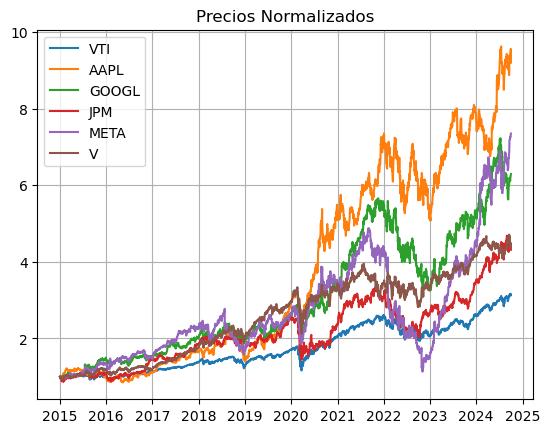

In [6]:
# Gráfica de los activos normalizados
for i in tickers:
    St['normalized_' + i] = St[i] / St[i].iloc[0]
    plt.plot(St['normalized_' + i], label = i)

plt.title('Precios Normalizados')
plt.legend()
plt.grid()

### Market beta y r2

In [8]:
# Calculemos beta y R2 de cada acción 
warnings.filterwarnings("ignore")

r2s = []
betas = []
rendimiento = []

for i in tickers:
    X = rt[['VTI']]
    y = rt[[i]]
    # Beta
    model = LinearRegression().fit(X, y)
    beta = model.coef_[0][0]
    betas.append(beta)
    # R2
    predictions = model.predict(X)
    r2 = r2_score(y_true = y, y_pred = predictions)
    r2s.append(r2)

In [9]:
df_info = pd.DataFrame({
    'tickers': tickers,
    'betas': betas,
    'r2': r2s
})
df_info

,tickers,betas,r2
0,VTI,1.000000,1.000000
1,AAPL,1.168921,0.543084
2,GOOGL,1.119916,0.507723
3,JPM,1.098211,0.531064
4,META,1.251401,0.360258
5,V,1.038915,0.585309


### Bootsrap e Histograma de market beta

In [11]:
betas = []
n_reps = 100
for i in range(n_reps):
    flag_frame = rt.sample(len(rt), replace=True)
    model = LinearRegression()
    temp_betas = []
    for j, ticker in enumerate(tickers[1:]):
        X = flag_frame[['VTI']]
        y = flag_frame[[ticker]]
        model.fit(X, y)
        beta = model.coef_[0][0]
        temp_betas.append(beta)
    betas.append(temp_betas)

df_betas = pd.DataFrame(betas, columns=tickers[1:])

df_betas

,AAPL,GOOGL,JPM,META,V
0,1.163460,1.140658,1.057932,1.294033,1.043169
1,1.197971,1.115443,1.094188,1.237400,1.017646
2,1.156789,1.128836,1.157897,1.265916,1.045117
3,1.221254,1.149773,1.067588,1.250270,1.022289
4,1.181009,1.123583,1.164530,1.289421,1.035208
...,...,...,...,...,...
95,1.173536,1.119824,1.037867,1.201404,0.997862
96,1.122545,1.077452,1.176864,1.233250,1.046946
97,1.172843,1.169068,1.111525,1.295830,1.000054
98,1.147270,1.110218,1.207209,1.252852,1.048095


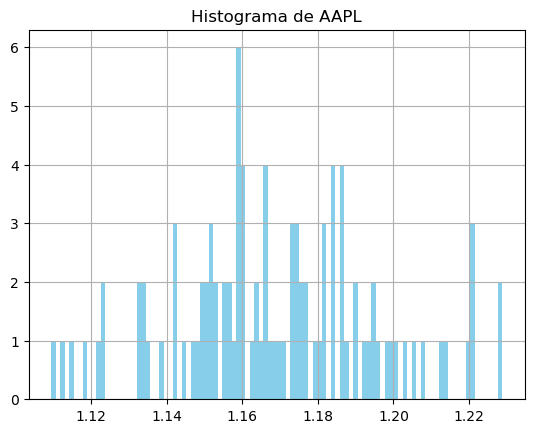

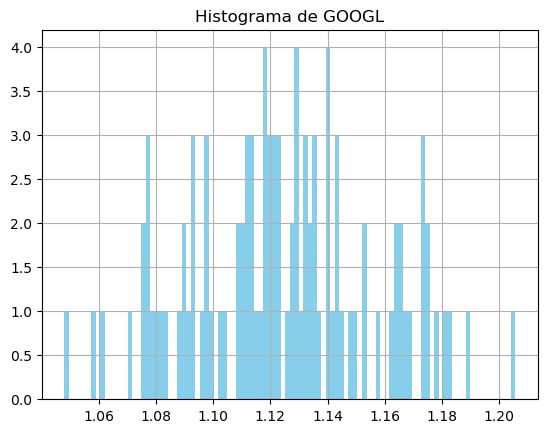

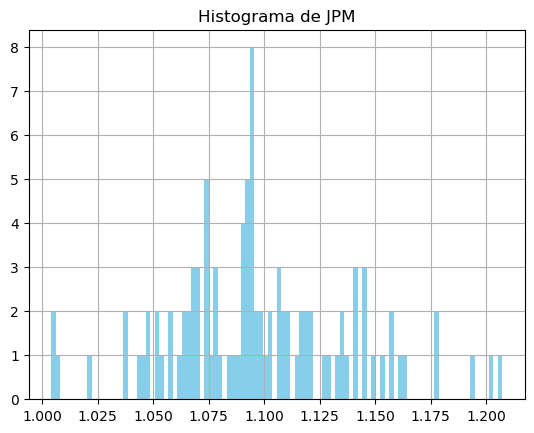

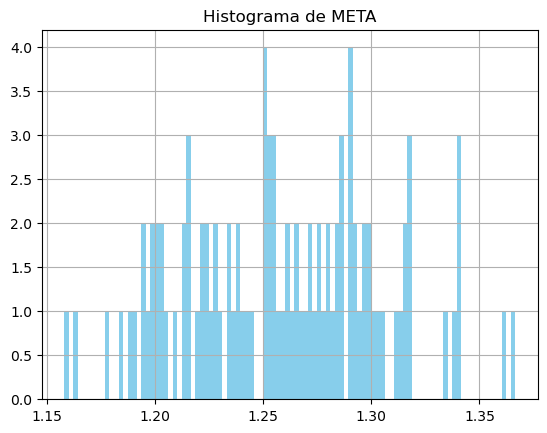

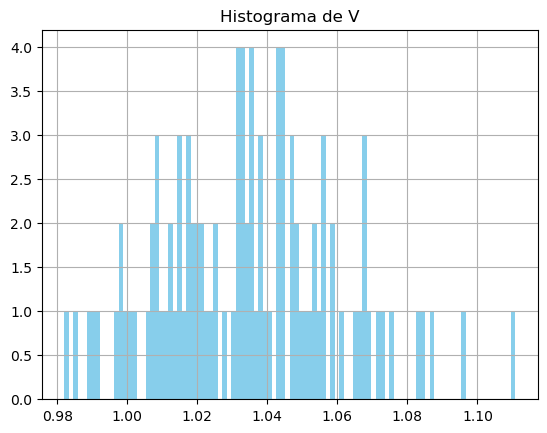

In [12]:
for col in df_betas.columns:
    plt.hist(df_betas[col], bins=100, color = 'skyblue')
    plt.title("Histograma de " + col)
    plt.grid()
    plt.show()

#### Apple

¿Cuál es la probabilidad de que la beta de Apple sea mayor a 1.17?

In [15]:
(df_betas.AAPL > 1.17).mean()

0.46

¿Cuál es la probabilidad de que la beta de Apple este entre 1.12 y 1.20?

In [17]:
((df_betas.AAPL >= 1.12) & (df_betas.AAPL <= 1.2)).mean()

0.84

#### Google

¿Cuál es la probabilidad de que la beta de Google sea mayor a 1.12?

In [20]:
(df_betas.GOOGL > 1.12).mean()

0.54

¿Cuál es la probabilidad de que la beta de Google este entre 1.08 y 1.16?

In [22]:
((df_betas.GOOGL >= 1.08) & (df_betas.GOOGL <= 1.16)).mean()

0.73

#### JP Morgan

¿Cuál es la probabilidad de que la beta de JPM sea mayor a 1.10?

In [25]:
(df_betas.JPM > 1.1).mean()

0.4

¿Cuál es la probabilidad de que la beta de JPM este entre 1.06 y 1.16?

In [27]:
((df_betas.JPM >= 1.06) & (df_betas.JPM <= 1.16)).mean()

0.78

#### META

¿Cuál es la probabilidad de que la beta de META sea mayor a 1.25?

In [30]:
(df_betas.META > 1.25).mean()

0.6

¿Cuál es la probabilidad de que la beta de META este entre 1.2 y 1.3?

In [32]:
((df_betas.META >= 1.2) & (df_betas.META <= 1.3)).mean()

0.72

#### Visa

¿Cuál es la probabilidad de que la beta de Visa sea mayor a 1.06?

In [35]:
(df_betas.V > 1.06).mean()

0.15

¿Cuál es la probabilidad de que la beta de Visa este entre 1.02 y 1.1?

In [37]:
((df_betas.V >= 1.02) & (df_betas.V <= 1.1)).mean()

0.67

### Bootsrap e Histograma de r2

In [39]:
r2 = []
n = 100
for i in range(n):
    flag_frame = rt.sample(len(rt), replace=True)
    temp_r2 = []
    for j, ticker in enumerate(tickers[1:]):
        X = flag_frame[['VTI']]
        y = flag_frame[[ticker]]
        model = LinearRegression().fit(X, y)
        predicciones = model.predict(X)
        flag_r2 = r2_score(y_true=y, y_pred=predicciones)
        temp_r2.append(flag_r2)
    r2.append(temp_r2)

df_r2 = pd.DataFrame(r2, columns=tickers[1:])
df_r2

,AAPL,GOOGL,JPM,META,V
0,0.483891,0.506988,0.486849,0.376688,0.553320
1,0.560345,0.569419,0.521582,0.366926,0.573869
2,0.517956,0.481484,0.488798,0.316752,0.604507
3,0.479511,0.501392,0.502557,0.315255,0.571864
4,0.556205,0.541646,0.555195,0.396074,0.601754
...,...,...,...,...,...
95,0.565069,0.516060,0.503733,0.323637,0.555999
96,0.534857,0.505009,0.535286,0.371685,0.592411
97,0.557613,0.473021,0.534079,0.322107,0.608453
98,0.553166,0.531618,0.559408,0.411601,0.612824


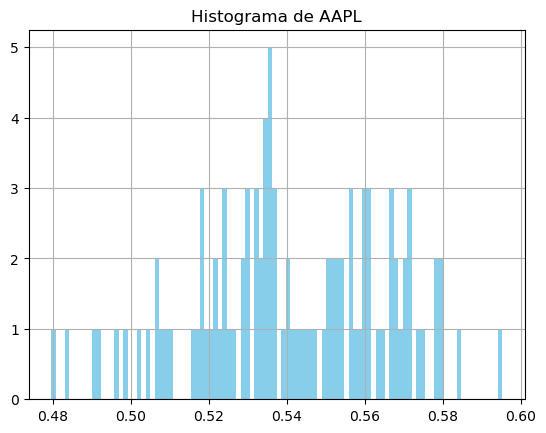

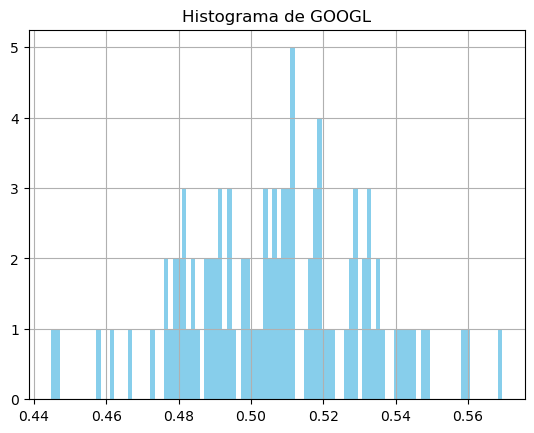

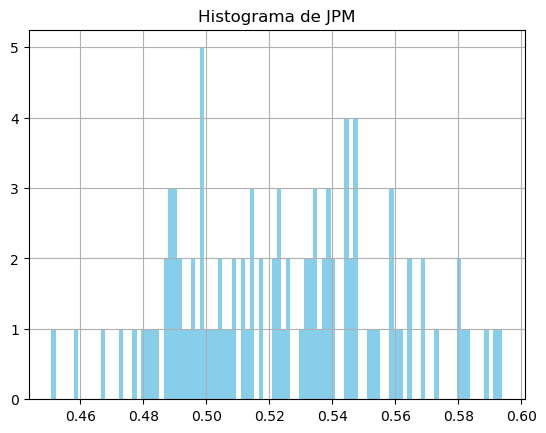

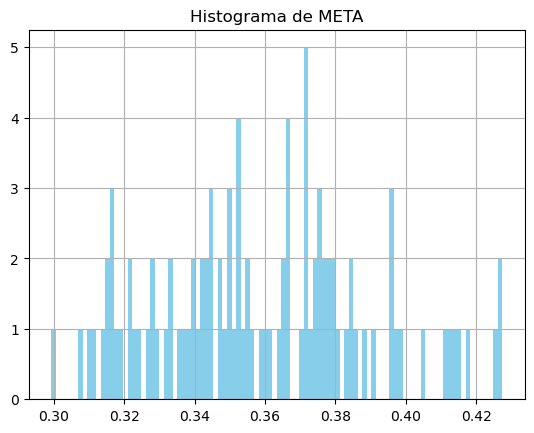

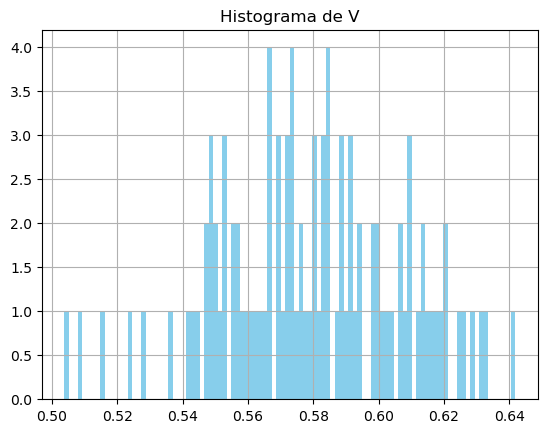

In [40]:
for col in df_r2.columns:
    plt.hist(df_r2[col], bins=100, color='skyblue')
    plt.title("Histograma de " + col)
    plt.grid()
    plt.show()

#### Apple

Probabilidad de que el 55% de la variación este explicado por el modelo

In [43]:
(df_r2.AAPL > 0.55).mean()

0.4

#### Google

Probabilidad de que el 55% de la variación este explicado por el modelo

In [46]:
(df_r2.GOOGL > 0.55).mean()

0.03

#### JP Morgan

Probabilidad de que el 55% de la variación este explicado por el modelo

In [49]:
(df_r2.JPM > 0.55).mean()

0.2

#### META

Probabilidad de que el 40% de la variación este explicado por el modelo

In [52]:
(df_r2.META > 0.4).mean()

0.09

#### Visa

Probabilidad de que el 60% de la variación este explicado por el modelo

In [55]:
(df_r2.V > 0.6).mean()

0.25

## Año 1

In [57]:
tickers = ['AAPL','GOOGL','JPM','META','V']
start_date = '2015-01-01'
end_date = '2019-01-01'
St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
rt = St.pct_change().dropna()

tickers2 = ['VTI', 'XOM']
St2 = yf.download(tickers2, start=start_date, end=end_date)['Adj Close']
rt2 = St2.pct_change().dropna()

df = pd.DataFrame({
    'means': rt.mean() * 252,
    'vol': rt.std() * np.sqrt(252)
})
df.T

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,GOOGL,JPM,META,V
means,0.139353,0.198511,0.158770,0.169232,0.201794
vol,0.244679,0.238055,0.215364,0.283034,0.209568


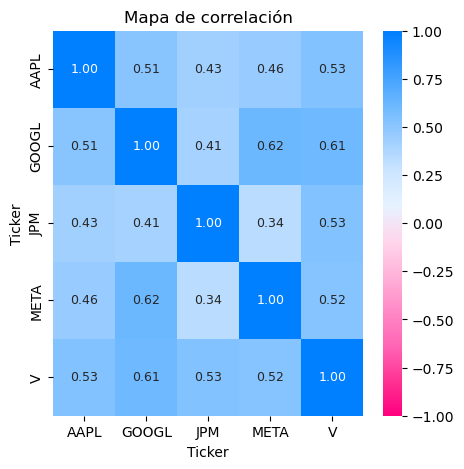

In [58]:
colors = ['#FF007F', '#FF3393', '#FF66B5', '#FF8AC7', '#FFB3D9', '#FFD6EB', 
          '#E6F2FF', '#CCE5FF', '#99CCFF', '#66B5FF', '#3399FF', '#007FFF']

custom_cmap = LinearSegmentedColormap.from_list("custom_pink_blue", colors)

c = rt.corr()
plt.figure(figsize=(5,5))
plt.title('Mapa de correlación')
sns.heatmap(c, vmin = -1, vmax = 1, cmap = custom_cmap, annot = True, fmt = '.2f', annot_kws={"size": 9})
plt.show()

In [59]:
# Para las simulaciones
sigma = rt.cov()
n_port = 10000
n_act = len(rt.keys())
w_sim = np.random.dirichlet((1,) * n_act, size=1)
w_sim.dot(df.means)
np.sqrt(w_sim.dot(sigma).dot(w_sim.T)) * np.sqrt(252)
W = np.random.dirichlet((1,) * n_act, size=n_port)

# Obten los rendimientos
rendimientos = W.dot(rt.mean()) * 252

# Calcula las volatilidades
zeros = np.zeros(n_port)
for i in range(len(zeros)):
    zeros[i] = np.sqrt(W[i,:].dot(sigma).dot(W[i,:])) * np.sqrt(252)
volatility = zeros

# Sharpe
rf = 0.05
sharpe = (rendimientos - rf) / volatility

# Data frame de resultados
resultados = pd.DataFrame({
    'rend': rendimientos,
    'vol': volatility,
    'sharpe': sharpe
})
pesos = pd.DataFrame(W, columns=rt.keys())
resultados = pd.concat([resultados, pesos], axis=1)
resultados

,rend,vol,sharpe,AAPL,GOOGL,JPM,META,V
0,0.157280,0.185982,0.576832,0.435731,0.047290,0.349223,0.065289,0.102467
1,0.185490,0.182645,0.741821,0.061835,0.335220,0.218715,0.059342,0.324888
2,0.168393,0.210118,0.563459,0.213434,0.119555,0.088696,0.487239,0.091076
3,0.180534,0.184768,0.706477,0.263119,0.182293,0.098161,0.000250,0.456176
4,0.158147,0.188975,0.572281,0.179992,0.004357,0.683219,0.092118,0.040315
...,...,...,...,...,...,...,...,...
9995,0.171854,0.188683,0.645810,0.232548,0.109615,0.143395,0.273032,0.241410
9996,0.193498,0.213588,0.671845,0.031872,0.767262,0.062108,0.034243,0.104515
9997,0.190674,0.202356,0.695178,0.118019,0.630067,0.038923,0.000245,0.212747
9998,0.168226,0.187311,0.631175,0.243536,0.042758,0.206681,0.286494,0.220532


In [60]:
emv = resultados[resultados.sharpe == resultados.sharpe.max()]
emv

,rend,vol,sharpe,AAPL,GOOGL,JPM,META,V
7287,0.19415,0.188073,0.766456,0.013434,0.31927,0.133251,0.000738,0.533308


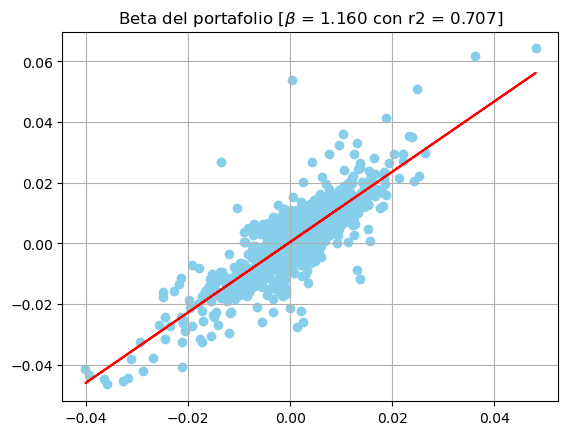

In [61]:
emv2 = emv.drop(['rend','vol','sharpe'], axis = 1)
daily_ret_port_beta = rt.dot(emv2.values[0])
rt2['portafolios'] = daily_ret_port_beta

model = LinearRegression()
X = rt2[['VTI']]
y = rt2[['portafolios']]

model.fit(X, y)
predicciones = model.predict(X)

beta_port = np.round(model.coef_[0][0],4)
r2_port = np.round(r2_score(y_pred = predicciones, y_true = y),4)

plt.scatter(X, y, c = 'skyblue')
plt.plot(X, predicciones, c = 'red')
plt.title(r'Beta del portafolio [$\beta$ = {:.3f} con r2 = {:.3f}]'.format(beta_port, r2_port))
plt.grid()

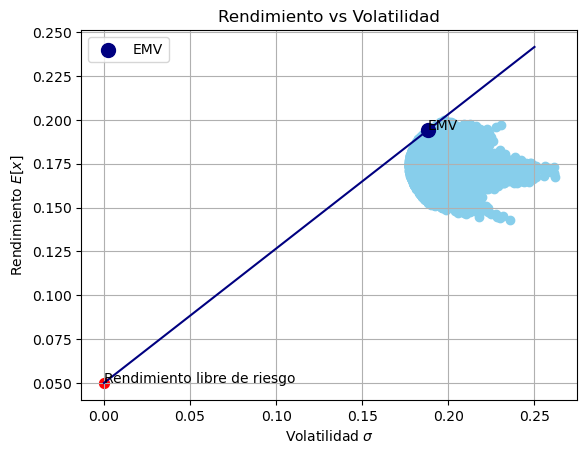

In [62]:
erp = emv.rend.iloc[0]
sp = emv.vol.iloc[0]

s = np.linspace(0,0.25,10)

lac = rf + s * emv.sharpe.iloc[0]

plt.scatter(resultados.vol, resultados.rend, c = 'skyblue')

plt.scatter(0, rf, s = 50, c = 'red')
plt.text(0, rf, 'Rendimiento libre de riesgo')

plt.scatter(emv.vol, emv.rend, c = 'navy', s=100, label = 'EMV')
plt.text(emv.vol, emv.rend, 'EMV')

plt.plot(s, lac, c = 'navy')

plt.legend()
plt.title('Rendimiento vs Volatilidad')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[x]$')
plt.grid()

In [63]:
alpha = [1,2,3,4,5,6,7,8,9,10]

w_opt= []
for i in alpha:
    w_opt.append(((erp-rf)/(i*sp**2)))

riesgo = []
for j in range(10):
    riesgo.append(w_opt[j]*sp)

dist = pd.DataFrame()
dist['aversion'] = alpha
dist['peso_acciones'] = w_opt
dist['peso_bonos'] = 1-dist.peso_acciones
dist['rendimientos'] = dist.peso_acciones * erp + dist.peso_bonos * rf
dist['volatilidad'] = riesgo
dist

,aversion,peso_acciones,peso_bonos,rendimientos,volatilidad
0,1,4.075306,-3.075306,0.637455,0.766456
1,2,2.037653,-1.037653,0.343727,0.383228
2,3,1.358435,-0.358435,0.245818,0.255485
3,4,1.018827,-0.018827,0.196864,0.191614
4,5,0.815061,0.184939,0.167491,0.153291
5,6,0.679218,0.320782,0.147909,0.127743
6,7,0.582187,0.417813,0.133922,0.109494
7,8,0.509413,0.490587,0.123432,0.095807
8,9,0.452812,0.547188,0.115273,0.085162
9,10,0.407531,0.592469,0.108745,0.076646


In [64]:
start_date = '2019-01-01'
end_date = '2020-01-01'
St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
rt = St.pct_change().dropna()

primero = St.iloc[0]  
ultimo = St.iloc[-1] 
rend_total = ultimo / primero -1
rend_total = pd.DataFrame(rend_total, columns=['rend'])
rend_total['pesos'] = emv2.values[0]

ve = (rend_total.rend * rend_total.pesos).sum()

stock = 10000 * dist.iloc[6, 1]
bonds = 10000 * dist.iloc[6, 2]

year_1 = stock * (1 + ve) + bonds * (1 + rf)
total = ve * dist.iloc[6, 1] + rf * dist.iloc[6, 2]

print('El rendimiento del portafolio de acciones fue de', np.round(ve * 100,2), 
      '%, donde se invirtio', np.round(dist.iloc[6, 1] * 100,2), '% de nuestro dinero')

print('El rendimiento de los bonos fue de', rf * 100, '%, donde se invirtio'
      , np.round(dist.iloc[6, 2] * 100,2), '% de nuestro dinero')

print('El rendimiento total del portafolio fue de', np.round(total * 100,2), '%')

print('Tenemos en la cuenta $', np.round(year_1,2))

[*********************100%***********************]  5 of 5 completed

El rendimiento del portafolio de acciones fue de 38.35 %, donde se invirtio 58.22 % de nuestro dinero
El rendimiento de los bonos fue de 5.0 %, donde se invirtio 41.78 % de nuestro dinero
El rendimiento total del portafolio fue de 24.42 %
Tenemos en la cuenta $ 12441.88


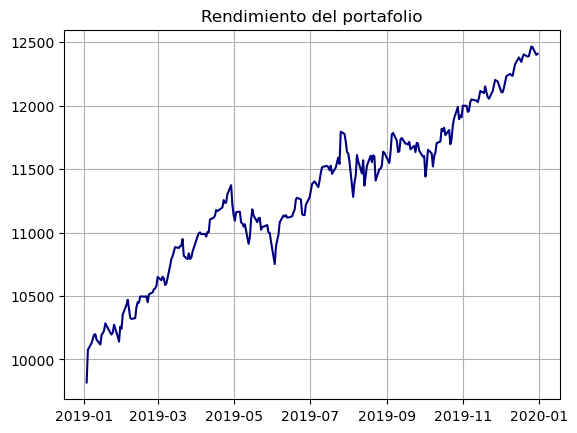

In [65]:
# h = emv2 * dist.iloc[6, 1]
# h['rf'] = dist.iloc[6, 2]
# rt['rf'] = rf / len(rt)
daily_ret_port = rt.dot(emv2.values[0])
graf = pd.DataFrame()
graf['port'] = daily_ret_port
graf['libre_riesgo'] = rf / len(St)

rend_port = graf.port * dist.iloc[6, 1] + graf.libre_riesgo * dist.iloc[6, 2]
precio_port = (1 + rend_port).cumprod() * 10000
plt.plot(precio_port, c = 'navy')

plt.title('Rendimiento del portafolio')
plt.grid()

## Año 2

In [67]:
start_date = '2015-01-01'
end_date = '2020-01-01'
St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
rt = St.pct_change().dropna()

St2 = yf.download(tickers2, start=start_date, end=end_date)['Adj Close']
rt2 = St2.pct_change().dropna()

df = pd.DataFrame({
    'means': rt.mean() * 252,
    'vol': rt.std() * np.sqrt(252)
})
df.T

[*********************100%***********************]  5 of 5 completed
[*********************100%***********************]  2 of 2 completed


Ticker,AAPL,GOOGL,JPM,META,V
means,0.246032,0.214096,0.208076,0.232967,0.236802
vol,0.248374,0.237758,0.210044,0.282188,0.203999


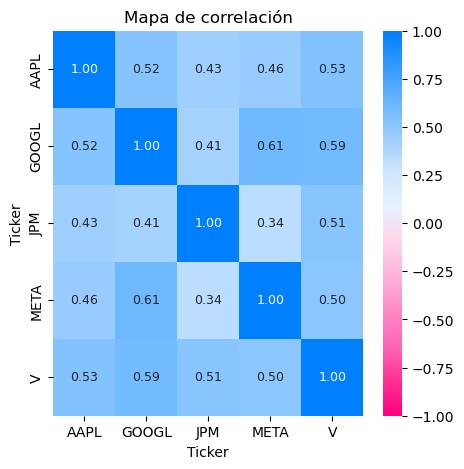

In [68]:
colors = ['#FF007F', '#FF3393', '#FF66B5', '#FF8AC7', '#FFB3D9', '#FFD6EB', 
          '#E6F2FF', '#CCE5FF', '#99CCFF', '#66B5FF', '#3399FF', '#007FFF']

custom_cmap = LinearSegmentedColormap.from_list("custom_pink_blue", colors)

c = rt.corr()
plt.figure(figsize=(5,5))
plt.title('Mapa de correlación')
sns.heatmap(c, vmin = -1, vmax = 1, cmap = custom_cmap, annot = True, fmt = '.2f', annot_kws={"size": 9})
plt.show()

In [69]:
# Para las simulaciones
sigma = rt.cov()
n_port = 10000
n_act = len(rt.keys())
w_sim = np.random.dirichlet((1,) * n_act, size=1)
w_sim.dot(df.means)
np.sqrt(w_sim.dot(sigma).dot(w_sim.T)) * np.sqrt(252)
W = np.random.dirichlet((1,) * n_act, size=n_port)

# Obten los rendimientos
rendimientos = W.dot(rt.mean()) * 252

# Calcula las volatilidades
zeros = np.zeros(n_port)
for i in range(len(zeros)):
    zeros[i] = np.sqrt(W[i,:].dot(sigma).dot(W[i,:])) * np.sqrt(252)
volatility = zeros

# Sharpe
rf = 0.05
sharpe = (rendimientos - rf) / volatility

# Data frame de resultados
resultados = pd.DataFrame({
    'rend': rendimientos,
    'vol': volatility,
    'sharpe': sharpe
})
pesos = pd.DataFrame(W, columns=rt.keys())
resultados = pd.concat([resultados, pesos], axis=1)
emv = resultados[resultados.sharpe == resultados.sharpe.max()]
emv

,rend,vol,sharpe,AAPL,GOOGL,JPM,META,V
4742,0.231783,0.177852,1.022102,0.234351,0.00202,0.239906,0.063804,0.459918


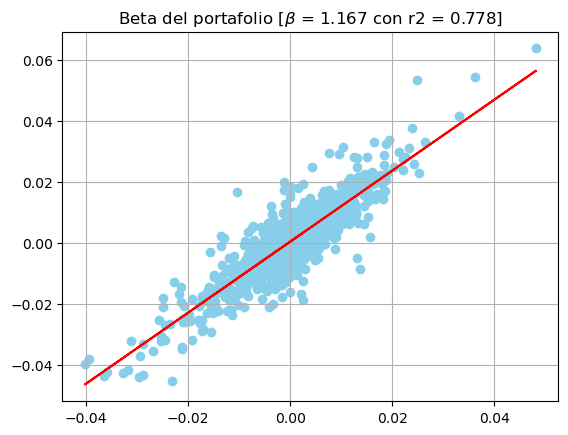

In [70]:
emv2 = emv.drop(['rend','vol','sharpe'], axis = 1)
daily_ret_port_beta = rt.dot(emv2.values[0])
rt2['portafolios'] = daily_ret_port_beta

model = LinearRegression()
X = rt2[['VTI']]
y = rt2[['portafolios']]

model.fit(X, y)
predicciones = model.predict(X)

beta_port = np.round(model.coef_[0][0],4)
r2_port = np.round(r2_score(y_pred = predicciones, y_true = y),4)

plt.scatter(X, y, c = 'skyblue')
plt.plot(X, predicciones, c = 'red')
plt.title(r'Beta del portafolio [$\beta$ = {:.3f} con r2 = {:.3f}]'.format(beta_port, r2_port))
plt.grid()

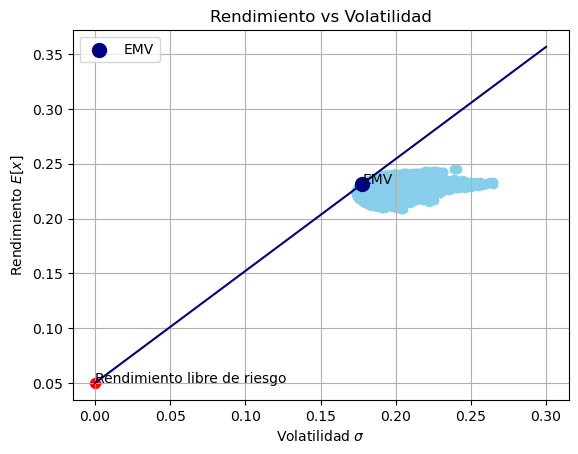

In [71]:
erp = emv.rend.iloc[0]
sp = emv.vol.iloc[0]

s = np.linspace(0,0.3,10)

lac = rf + s * emv.sharpe.iloc[0]

plt.scatter(resultados.vol, resultados.rend, c = 'skyblue')

plt.scatter(0, rf, s = 50, c = 'red')
plt.text(0, rf, 'Rendimiento libre de riesgo')

plt.scatter(emv.vol, emv.rend, c = 'navy', s=100, label = 'EMV')
plt.text(emv.vol, emv.rend, 'EMV')

plt.plot(s, lac, c = 'navy')

plt.legend()
plt.title('Rendimiento vs Volatilidad')
plt.xlabel('Volatilidad $\sigma$')
plt.ylabel('Rendimiento $E[x]$')
plt.grid()

In [72]:
alpha = [1,2,3,4,5,6,7,8,9,10]

w_opt= []
for i in alpha:
    w_opt.append(((erp-rf)/(i*sp**2)))

riesgo = []
for j in range(10):
    riesgo.append(w_opt[j]*sp)

dist = pd.DataFrame()
dist['aversion'] = alpha
dist['peso_acciones'] = w_opt
dist['peso_bonos'] = 1-dist.peso_acciones
dist['rendimientos'] = dist.peso_acciones * erp + dist.peso_bonos * rf
dist['volatilidad'] = riesgo
dist

,aversion,peso_acciones,peso_bonos,rendimientos,volatilidad
0,1,5.746921,-4.746921,1.094693,1.022102
1,2,2.873461,-1.873461,0.572346,0.511051
2,3,1.915640,-0.915640,0.398231,0.340701
3,4,1.436730,-0.436730,0.311173,0.255526
4,5,1.149384,-0.149384,0.258939,0.204420
5,6,0.957820,0.042180,0.224115,0.170350
6,7,0.820989,0.179011,0.199242,0.146015
7,8,0.718365,0.281635,0.180587,0.127763
8,9,0.638547,0.361453,0.166077,0.113567
9,10,0.574692,0.425308,0.154469,0.102210


In [73]:
start_date = '2020-01-01'
end_date = '2021-01-01'
St = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
rt = St.pct_change().dropna()

primero = St.iloc[0]  
ultimo = St.iloc[-1] 
rend_total = (ultimo - primero) / primero
rend_total
rend_total = pd.DataFrame(rend_total, columns=['rend'])

rend_total['pesos'] = emv2.values[0]
rend_total

ve = (rend_total.rend * rend_total.pesos).sum()
stock = year_1 * dist.iloc[6, 1]
bonds = year_1 * dist.iloc[6, 2]

year_2 = stock * (1 + ve) + bonds * (1 + rf)
total = ve * dist.iloc[6, 1] + rf * dist.iloc[6, 2]

print('El rendimiento del portafolio de acciones fue de', np.round(ve * 100,2), 
      '%, donde se invirtio', np.round(dist.iloc[6, 1] * 100,2), '% de nuestro dinero')

print('El rendimiento de los bonos fue de', rf * 100, '%, donde se invirtio'
      , np.round(dist.iloc[6, 2] * 100,2), '% de nuestro dinero')

print('El rendimiento total del portafolio fue de', np.round(total * 100,2), '%')

print('Tenemos en la cuenta $', np.round(year_2,2))

[*********************100%***********************]  5 of 5 completed

El rendimiento del portafolio de acciones fue de 25.69 %, donde se invirtio 82.1 % de nuestro dinero
El rendimiento de los bonos fue de 5.0 %, donde se invirtio 17.9 % de nuestro dinero
El rendimiento total del portafolio fue de 21.99 %
Tenemos en la cuenta $ 15177.26


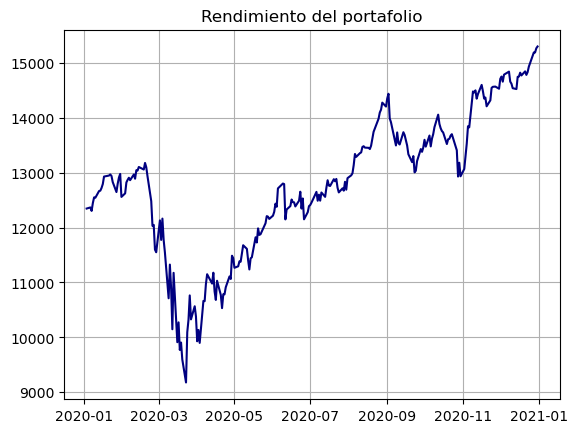

In [74]:
daily_ret_port = rt.dot(emv2.values[0])
graf = pd.DataFrame()
graf['port'] = daily_ret_port
graf['libre_riesgo'] = rf / len(St)

rend_port = graf.port * dist.iloc[6, 1] + graf.libre_riesgo * dist.iloc[6, 2]
precio_port = (1 + rend_port).cumprod() * year_1
plt.plot(precio_port, c = 'navy')

plt.title('Rendimiento del portafolio')
plt.grid()